In [13]:
import numpy as np
from Outils.dataloader import load_CIFAR10

# Delta Encoding 

In [14]:
# Load the raw CIFAR-10 data.
cifar10_dir = 'Dataset/cifar-10-batches-py'

# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


In [3]:
X_test.shape

(10000, 32, 32, 3)

In [15]:
def Delta_Encoder(X):
    '''
    Delta encoder
    '''
    Y = np.copy(X)
    Y[:,1:,:,:] = X[:,1:,:,:] - X[:,:-1,:,:]

    return Y 

In [16]:
def Delta_Decoder(Y):
    X = np.cumsum(Y, axis = 1)
    return X 

In [17]:
X_encoded = Delta_Encoder(X_test)
X_decoded = Delta_Decoder(X_encoded)

In [18]:
(X_test !=  X_decoded).sum()

0

In [1]:
import cv2

In [8]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
lena = cv2.imread("lena.png")

In [9]:
lena_delta = np.copy(lena)
lena_delta[1:,:,:] = lena[1:,:,:] - lena[:-1,:,:]

In [32]:
lena_delta_delta = np.copy(lena_delta)
lena_delta_delta[1:,:,:] = lena_delta[1:,:,:] - lena_delta[:-1,:,:]

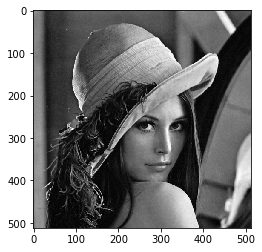

In [6]:
plt.imshow(lena)

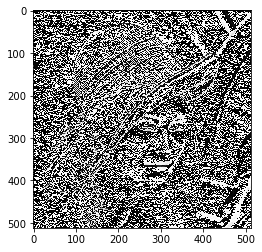

In [10]:
plt.imshow(lena_delta)

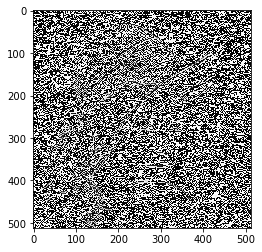

In [33]:
plt.imshow(lena_delta_delta)

In [30]:
cv2.imwrite("lena_delta.png", lena_delta)

True

In [34]:
cv2.imwrite("lena_delta_delta.png", lena_delta_delta)

True

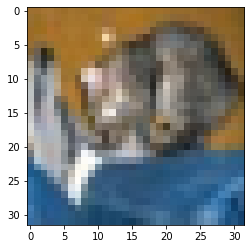

In [23]:
plt.imshow(X_test[0].astype("uint8"))

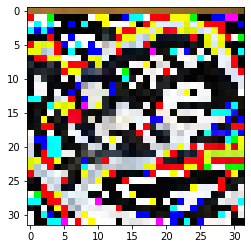

In [29]:
plt.imshow(X_encoded[0].astype("uint8"))